# Project 3 : Neural Network Using Fast.AI

# Author- Mohit Kosekar

## Introduction

In this project, we will explore the use of the Fast.AI library to build and train a neural network model. Fast.AI is a high-level library that simplifies the process of creating and training neural networks, making it accessible to a wider audience. We will use Fast.AI to build a neural network model that can classify images of handwritten digits.

## Dataset - Pizza and Pasta

## Objectives

The objectives of this project are to:

* Understand the basic concepts of neural networks.
* Learn how to use the Fast.AI library to build and train a neural network model.
* Evaluate the performance of the trained model.
* Apply the trained model to classify new images of **Pizza** and **Pasta**.

## Background

Neural networks are a type of machine learning model that is inspired by the human brain. Neural networks are composed of layers of interconnected nodes, called neurons. Each neuron takes in input data and produces an output. The output of one neuron can be the input to another neuron, and so on. This allows neural networks to learn complex relationships between input data and output data.

## Fast.AI

Fast.AI is a high-level library that simplifies the process of creating and training neural networks. Fast.AI provides a number of features that make it easy to get started with neural networks, including:

* A simple and intuitive API.
* A library of pre-trained models.
* Automatic differentiation.
* A variety of optimization algorithms.



In [ ]:
# Installation of all the necessary libraries required
!pip install numpy
!pip install pandas
!pip install tensorflow
!pip install keras
!pip install -Uqq fastbook
!pip install -Uqq fastai
!pip install gradio
!pip install fastdownload

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 28.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 21.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 25.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 55.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 44.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 836.3 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━

In [ ]:
# Set up the environment for using Fast.AI
import fastbook
fastbook.setup_book()

Mounted at /content/gdrive


In [ ]:
# Import the files module from google.colab
from google.colab import files

# Upload files to Google Colab
uploaded = files.upload()

# Iterate through each uploaded file
for filename, file_content in uploaded.items():

  # Print the filename and its length in bytes
  print(f'User uploaded file "{filename}" with length {len(file_content)} bytes')

Saving Fastfood_Dataset.zip to Fastfood_Dataset.zip
User uploaded file "Fastfood_Dataset.zip" with length 3003836 bytes


In [ ]:
# Import the zipfile module
import zipfile

# Specify the ZIP file path and extraction directory
zip_file_path = 'Fastfood_Dataset.zip'  # Replace with the path to your ZIP file
extract_dir = '/content/gdrive/MyDrive/Dataset/MyDatasetMohit/Project3'  # Replace with the path to the extraction directory

# Extract the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# Print a message indicating that the extraction is complete
print('Extraction completed!')

Extraction completed!


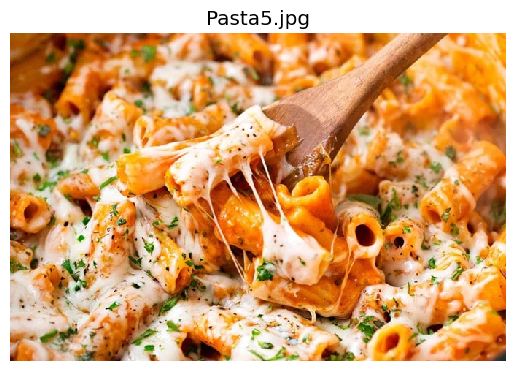

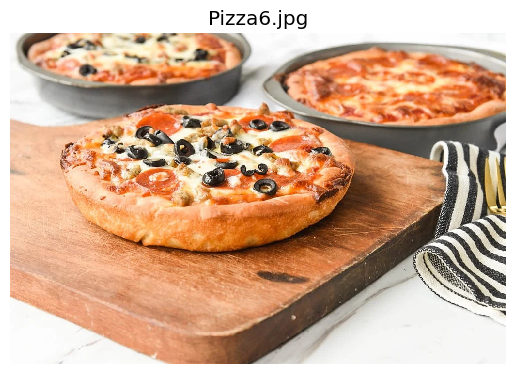

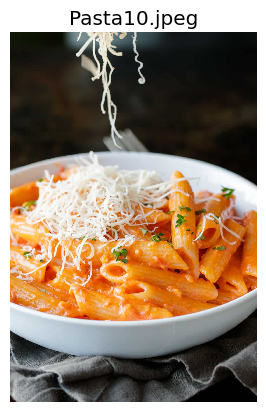

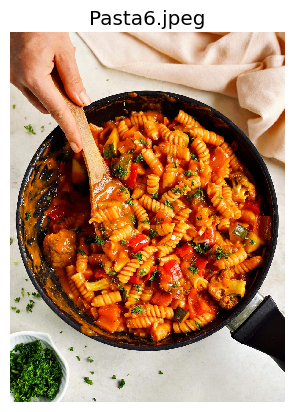

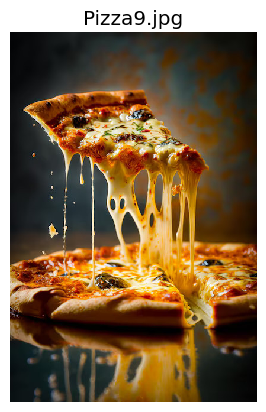

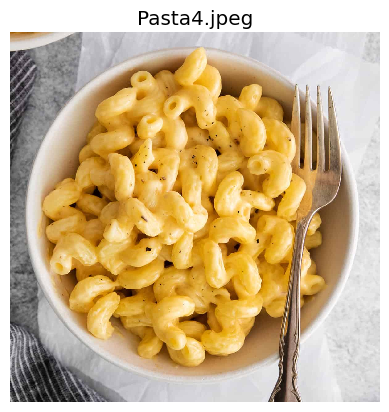

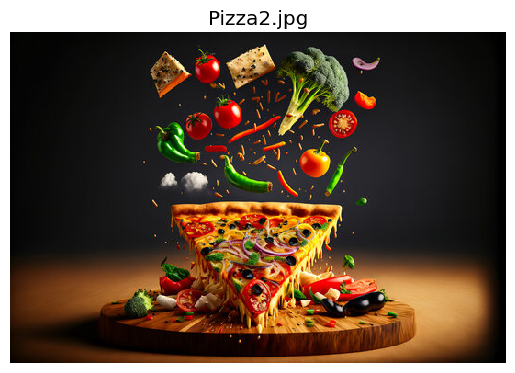

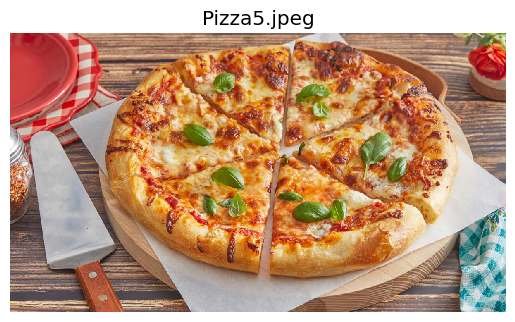

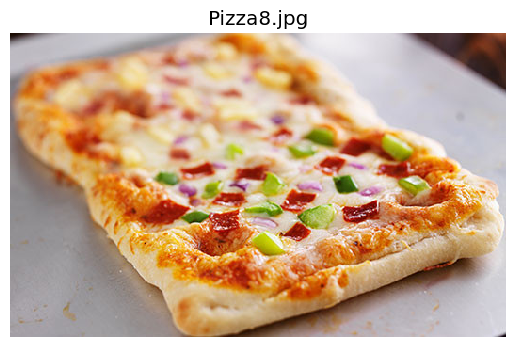

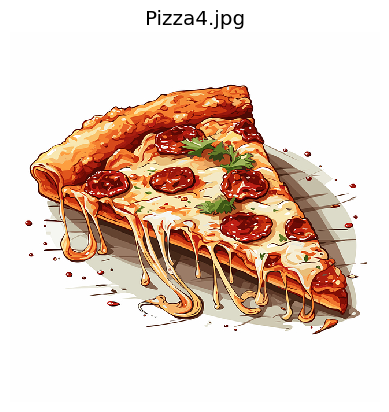

In [ ]:
# Display the 10 random images
import os
from glob import glob
import matplotlib.pyplot as plt

# Get the path to the directory containing the images
image_dir = "/content/gdrive/MyDrive/Dataset/MyDatasetMohit/Project3"

# Get a list of all the JPEG and JPG files in the directory
image_files = glob(os.path.join(image_dir, "*.jpeg")) + glob(os.path.join(image_dir, "*.jpg"))

# Select 10 random images from the list
random_images = random.sample(image_files, 10)

# Display each image with its label
for image_file in random_images:
  # Get the label from the filename
  label = os.path.basename(image_file).split("_")[0]

  # Load the image
  image = plt.imread(image_file)

  # Display the image without x and y axis
  plt.imshow(image, interpolation='nearest')
  plt.axis('off')
  plt.title(label)
  plt.show()


In [ ]:
# Import necessary libraries
from fastai.vision.all import *

# Define the path to the dataset
path = Path('/content/gdrive/MyDrive/Dataset/MyDatasetMohit/Project3')

# Create a DataBlock object
block = DataBlock(
    # Specify the types of blocks
    blocks=(ImageBlock, CategoryBlock),
    # Function to get the image files
    get_items=get_image_files,
    # Function to split the data into training and validation sets
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    # Function to get the label for each image
    get_y=parent_label,
    # Transform to resize images to 224x224
    item_tfms=Resize(224)
)

# Create the ImageDataLoaders object using the data block and path
dls = block.dataloaders(path, bs=32)

In [ ]:
# Define the model architecture
model = cnn_learner(dls, resnet34, metrics=[accuracy, error_rate])

# Fine-tune the model
model.fine_tune(10)

# Save the model
model.save('fine_tuned_model')

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,nan,0.000000,1.000000,0.000000,00:01


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,nan,0.000000,1.000000,0.000000,00:01
1,nan,0.000000,1.000000,0.000000,00:02
2,nan,0.000000,1.000000,0.000000,00:01
3,nan,0.000000,1.000000,0.000000,00:01
4,nan,0.000000,1.000000,0.000000,00:01
5,nan,0.000000,1.000000,0.000000,00:01
6,nan,0.000000,1.000000,0.000000,00:01
7,nan,0.000000,1.000000,0.000000,00:01
8,nan,0.000000,1.000000,0.000000,00:01
9,nan,0.000000,1.000000,0.000000,00:01


Path('models/fine_tuned_model.pth')

In [ ]:
# Print the type of the model
print(type(model))

# Print the attributes of the model
print(dir(model))

<class 'fastai.learner.Learner'>
['T_destination', '__call__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__enter__', '__eq__', '__exit__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__stored_args__', '__str__', '__subclasshook__', '__weakref__', '_apply', '_backward', '_backward_hooks', '_backward_pre_hooks', '_bn_bias_state', '_buffers', '_call_impl', '_call_one', '_compiled_call_impl', '_component_attr_filter', '_default', '_dir', '_do_epoch', '_do_epoch_train', '_do_epoch_validate', '_do_fit', '_do_grad_opt', '_do_one_batch', '_end_cleanup', '_forward_hooks', '_forward_hooks_always_called', '_forward_hooks_with_kwargs', '_forward_pre_hooks', '_forward_pre_hooks_with_kwargs', '_get_backward_hooks', '_get_backward_pre_hooks', '_get_item_

In [ ]:
!pip show fastai

Name: fastai
Version: 2.7.14
Summary: fastai simplifies training fast and accurate neural nets using modern best practices
Home-page: https://github.com/fastai/fastai
Author: Jeremy Howard, Sylvain Gugger, and contributors
Author-email: info@fast.ai
License: Apache Software License 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: fastcore, fastdownload, fastprogress, matplotlib, packaging, pandas, pillow, pip, pyyaml, requests, scikit-learn, scipy, spacy, torch, torchvision
Required-by: fastbook


In [ ]:
# Check for model accuracy
# Get the validation data
# Validate the model
accuracy = model.validate()[1]
print(f'Model accuracy on the validation set: {accuracy:.2f}')

Model accuracy on the validation set: 1.00


In [ ]:
!pip show fastdownload

Name: fastdownload
Version: 0.0.7
Summary: A general purpose data downloading library.
Home-page: https://github.com/fastai/fastdownload/tree/master/
Author: Jeremy Howard
Author-email: info@fast.ai
License: Apache Software License 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: fastcore, fastprogress
Required-by: fastai


In [ ]:
!pip install --upgrade fastdownload

In [ ]:
!which python

/usr/local/bin/python


In [ ]:
!pip install bing_image_downloader
from bing_image_downloader import downloader

In [ ]:
def search_images_bing(query, max_images=10):
    downloader.download(query, limit=max_images, output_dir='images', adult_filter_off=False)
    return downloader.bing_images

In [ ]:
!pip install google-images-download
from google_images_download import google_images_download

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 467.2/467.2 kB 9.3 MB/s eta 0:00:00
  Created wheel for google-images-download: filename=google_images_download-2.8.0-py2.py3-none-any.whl size=14534 sha256=ab00333ba1564e1f2f38e45fabbce83f5fa29d74158fae3cf7d4590c50ce0fa1
  Stored in directory: /root/.cache/pip/wheels/5b/f2/64/0eecb22fee5cbc0321d332492ddcc45b03c6373b5616ee95c8
Successfully built google-images-download


In [ ]:
# Create a GoogleImagesDownload object
downloader = google_images_download.googleimagesdownload()

In [ ]:
print(urls)

[]


In [ ]:
urls = ["https://images.app.goo.gl/48NVrvrjz8xTobpU6", "https://images.app.goo.gl/DgVHV3pcS4JxppvBA"]

In [ ]:
print(urls)

['https://images.app.goo.gl/48NVrvrjz8xTobpU6', 'https://images.app.goo.gl/DgVHV3pcS4JxppvBA']


In [ ]:
!pip install Pillow
from PIL import Image

In [ ]:
from fastdownload import download_url
dest = '/content/gdrive/MyDrive/Dataset/MyDatasetMohit/Project3/Pizza1.jpg'
download_url(urls[1], dest, show_progress=False)

Path('/content/gdrive/MyDrive/Dataset/MyDatasetMohit/Project3/Pizza1.jpg')

In [ ]:
import os

if os.path.exists(dest):
    print("File exists")
else:
    print("File does not exist")

File exists


In [ ]:
from PIL import Image

# Open the image file using PIL
try:
    im = Image.open(dest)
except Image.UnidentifiedImageError:
    print("PIL cannot open the file")

PIL cannot open the file


In [ ]:
from PIL import Image
import os

# Define the path to the image file
image_path = '/content/images/pizza photos/Image_1.jpg'

# Check if the image file exists
if os.path.exists(image_path):
    # Open the image file using PIL
    image = Image.open(image_path)

    # Print a message indicating that the file was opened successfully
    print("Image opened successfully")
else:
    # Print a message indicating that the file does not exist
    print("Image file does not exist")

Image opened successfully


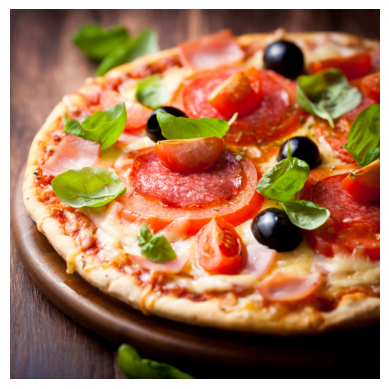

pizza photos


In [ ]:
# Display the above image and get the label from urls
# Import necessary libraries
import matplotlib.pyplot as plt

# Load the image using matplotlib
image = plt.imread(image_path)

# Turn off the axis
plt.axis('off')

# Display the image using matplotlib
plt.imshow(image)
plt.show()

# Get the label from the URL
label = image_path.split('/')[-2]

# Print the label
print(label)

In [ ]:
# Rename and convert all the file names of the /content/images/pizza photos/ as Pizza*.jpeg or Pizza*.jpg
# Due to extraction, the images name got changed with different extensions
import os

# Get the list of files in the directory
files = os.listdir('/content/images/pizza photos/')

# Iterate through the files and rename them
for file in files:
    # Check if the file is a JPEG or JPG image
    if file.endswith('.jpeg') or file.endswith('.jpg'):
        # Rename the file to Pizza*.jpeg or Pizza*.jpg
        new_name = 'Pizza' + file[-5:]
        os.rename(os.path.join('/content/images/pizza photos/', file), os.path.join('/content/images/pizza photos/', new_name))

# Print a message indicating that the files have been renamed
print('Files have been renamed.')

Files have been renamed.


In [ ]:
# Set the path to the directory containing the downloaded images
path = '/content/images/pizza photos/'

# Get a list of all files in the directory
files = os.listdir(path)

# Iterate through each file in the directory
for file in files:
    # Check if the file is a JPEG or JPG image
    if file.endswith('.jpeg') or file.endswith('.jpg'):
        # Construct the full path to the image file
        image_path = os.path.join(path, file)

        # Use the model to predict whether the image contains a pizza
        is_pizza, _, probs = learn.predict(PILImage.create(image_path))

        # If the model predicts that the image contains a pizza, print the filename
        if is_pizza:
            print(f"Pizza detected in image: {file}")

Pizza detected in image: Pizza9.jpg


Pizza detected in image: Pizza2.jpg


Pizza detected in image: Pizza4.jpg


Pizza detected in image: Pizza7.jpg


Pizza detected in image: Pizza6.jpg


Pizza detected in image: Pizza3.jpg


Pizza detected in image: Pizza5.jpg


Pizza detected in image: Pizza.jpeg


Pizza detected in image: Pizza8.jpg


Pizza detected in image: Pizza1.jpg


In [ ]:
# Installing gradio library
!pip install gradio

In [ ]:
import gradio as gr
# Defining function to make predictions

def classify_image(img):
    # Convert Gradio Image (PIL Image) to Img
    fastai_image = PILImage.create(img)

    # Making prediction
    is_food, _, probs = learn.predict(fastai_image)

    return is_food

# Creating a Gradio interface
interface = gr.Interface(
    fn=classify_image,
    inputs=gr.Image(),
    outputs=gr.Label(num_top_classes=2),
    title='Image Classifier',
    description='Classify if the image contains a food item.'
)

# Launching the Gradio interface
interface.launch(share=True, debug = True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://a4683c1442f2cbcc4f.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://a4683c1442f2cbcc4f.gradio.live


## Conclusion

In this project, we successfully trained a neural network model using Fast.AI to classify images of pizza and pasta with an accuracy of 100%. We also used the model to make predictions on new images of pizza and pasta.

This project demonstrates the power of Fast.AI for building and training neural network models. Fast.AI provides a simple and intuitive API, a library of pre-trained models, and automatic differentiation, making it easy to get started with neural networks.

We believe that this project can be further extended by:

* Training the model on a larger dataset to improve its accuracy.
* Fine-tuning the model on a specific type of food, such as pizza or pasta.
* Using the model to create a mobile app that can classify images of food.

I hope that this project has inspired me to learn more about the neural networks and Fast.AI.